# 导入模块

In [1]:
import pandas as pd
import sklearn as skr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.relativedelta import relativedelta
from typing import *
import random
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')
np.random.seed(1024)

labels = ['total_purchase_amt', 'total_redeem_amt']

In [2]:
date_indexs = ['week','year','month','weekday','day']

# 导入所有数据特征

预处理：
- 平滑/差分

时间序列特征工程：
- https://blog.csdn.net/weixin_53741275/article/details/111939334

In [214]:
data_purchase = pd.read_csv('The-Purchase-and-Redemption-Forecast-Challenge-baseline/total_balance_purchase.csv')
data_purchase['date'] = pd.to_datetime(data_purchase['date'])
data_purchase = data_purchase[[x for x in data_purchase.columns if x not in date_indexs]]

In [215]:
data_redeem = pd.read_csv('The-Purchase-and-Redemption-Forecast-Challenge-baseline/total_balance_redeem.csv')
data_redeem['date'] = pd.to_datetime(data_redeem['date'])
data_redeem = data_redeem[[x for x in data_redeem.columns if x not in date_indexs]]

In [216]:
data_purchase.head()

,date,total_purchase_amt,total_redeem_amt,is_weekend,is_holiday,is_firstday_of_holiday,is_lastday_of_holiday,is_firstday_of_work,is_work,is_gonna_work_tomorrow,...,dis_from_middleofweek,dis_from_endofweek,dis_from_purchase_peak,dis_from_purchase_valley,purchase_weekday_median,purchase_weekday_mean,purchase_weekday_min,purchase_weekday_max,purchase_weekday_std,purchase_weekday_skew
0,2013-07-01,32488348.0,5525022.0,0,0,0,0,0,1,0,...,3,6,1,6,318002728.0,3.338152e+08,245450766.0,453955303.0,7.165719e+07,0.737602
1,2013-07-02,29037390.0,2554548.0,0,0,0,0,0,1,0,...,2,5,0,5,313677307.0,3.230074e+08,260091330.0,417327518.0,5.074888e+07,0.512311
2,2013-07-03,27270770.0,5953867.0,0,0,0,0,0,1,0,...,1,4,1,4,338609087.0,3.336676e+08,193045106.0,392838756.0,5.155167e+07,-1.687154
3,2013-07-04,18321185.0,6410729.0,0,0,0,0,0,1,0,...,0,3,2,3,239300383.0,2.383872e+08,125336258.0,301413900.0,4.154269e+07,-1.522149
4,2013-07-05,11648749.0,2763587.0,0,0,0,0,0,1,0,...,1,2,3,2,177999186.0,1.885962e+08,146823669.0,287240171.0,4.289496e+07,1.597206


In [16]:
data_purchase.tail()

,date,total_purchase_amt,total_redeem_amt,is_weekend,is_holiday,is_firstday_of_holiday,is_lastday_of_holiday,is_firstday_of_work,is_work,is_gonna_work_tomorrow,...,dis_to_holiday,dis_from_holiday,dis_to_holiendday,dis_from_holiendday,dis_from_startofmonth,dis_from_middleofmonth,dis_from_middleofweek,dis_from_endofweek,dis_from_purchase_peak,dis_from_purchase_valley
452,2014-09-26,NaN,NaN,0,0,0,0,0,1,0,...,0,10,0,10,10,10,1,2,3,2
453,2014-09-27,NaN,NaN,1,0,0,0,0,0,1,...,0,10,0,10,10,10,2,1,4,1
454,2014-09-28,NaN,NaN,1,0,0,0,0,1,0,...,0,10,0,10,10,10,3,0,5,0
455,2014-09-29,NaN,NaN,0,0,0,0,0,1,0,...,0,10,0,10,10,10,3,6,1,6
456,2014-09-30,NaN,NaN,0,0,0,0,0,1,0,...,0,10,0,10,10,10,2,5,0,5


# 特征选择

## is特征

In [17]:
data_purchase_is = data_purchase.iloc[:,:29]
data_redeem_is = data_redeem.iloc[:,:29]

In [18]:
data_purchase_is.head()

,date,total_purchase_amt,total_redeem_amt,is_weekend,is_holiday,is_firstday_of_holiday,is_lastday_of_holiday,is_firstday_of_work,is_work,is_gonna_work_tomorrow,...,is_second_week,is_third_week,is_fourth_week,weekday_onehot_0,weekday_onehot_1,weekday_onehot_2,weekday_onehot_3,weekday_onehot_4,weekday_onehot_5,weekday_onehot_6
0,2013-07-01,32488348.0,5525022.0,0,0,0,0,0,1,0,...,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013-07-02,29037390.0,2554548.0,0,0,0,0,0,1,0,...,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2013-07-03,27270770.0,5953867.0,0,0,0,0,0,1,0,...,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2013-07-04,18321185.0,6410729.0,0,0,0,0,0,1,0,...,0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2013-07-05,11648749.0,2763587.0,0,0,0,0,0,1,0,...,0,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### purchase

In [19]:
# 绘制箱型图

def draw_boxplot(data: pd.DataFrame)->None:
    f, axes = plt.subplots(7, 4, figsize=(18, 24))
    global date_indexs, labels
    count = 0
    for i in [x for x in data.columns if x not in date_indexs + labels + ['date']]:
        sns.boxenplot(x=i, y='total_purchase_amt', data=data, ax=axes[count // 4][count % 4])
        count += 1

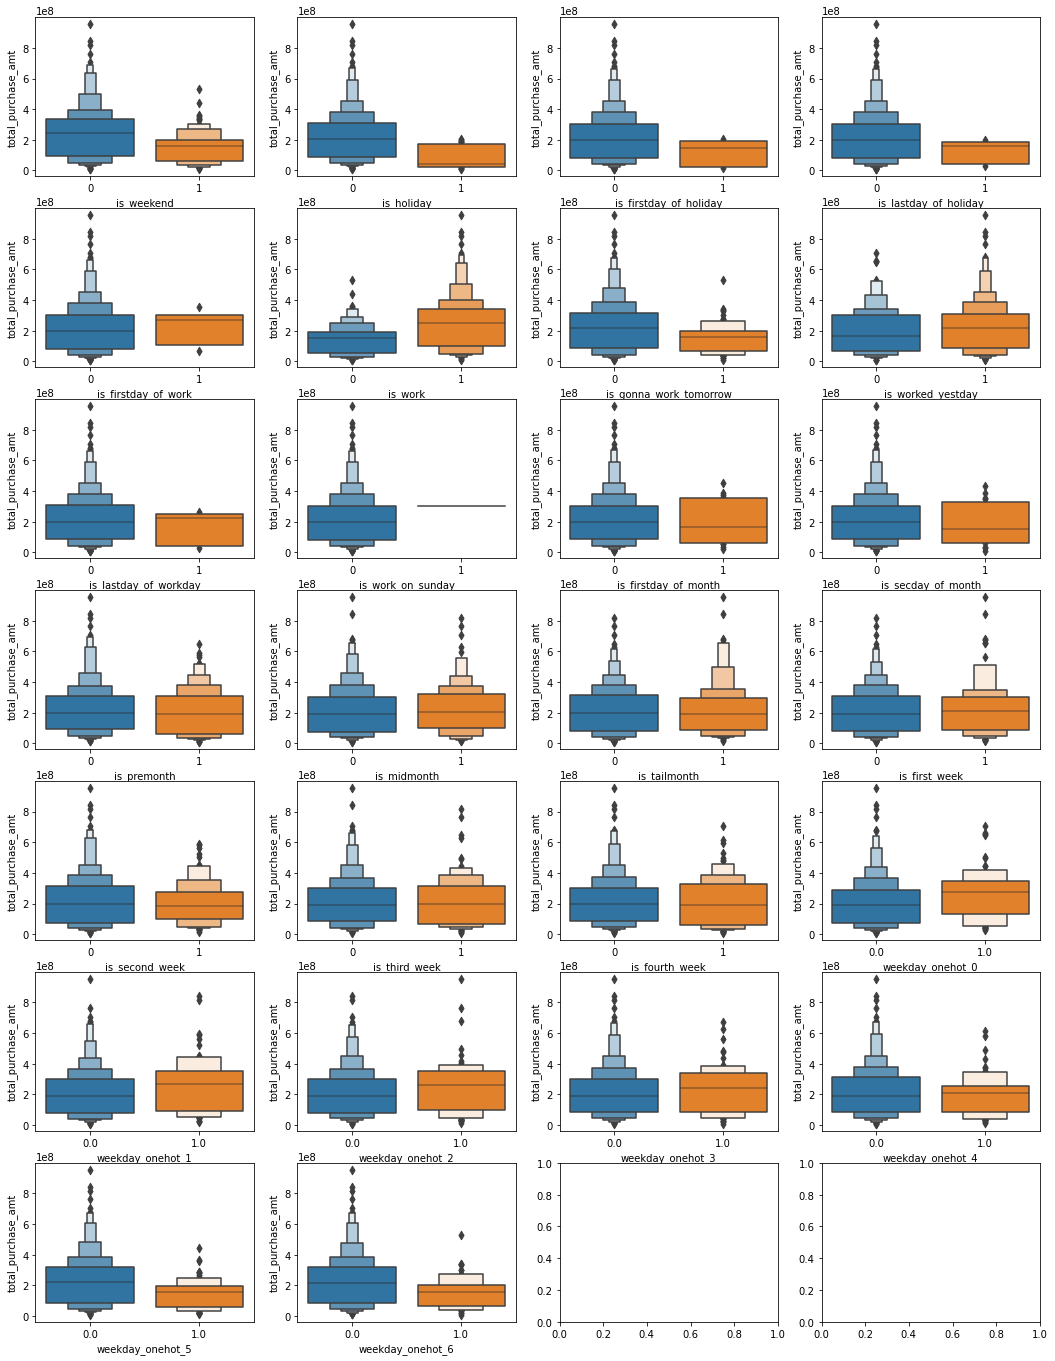

In [20]:
draw_boxplot(data_purchase_is)

In [21]:
## 剔除看起来较差的特征 (for rate)

purchase_feature_seems_useless = [
      #样本量太少，建模时无效；但若确定这是一个有用规则，可以对结果做修正
      'is_work_on_sunday',
    'is_premonth'
      #中位数差异不明显
      'is_third_week',
    'is_fourth_week'
]


In [22]:
# 画相关性热力图

def draw_correlation_heatmap(data: pd.DataFrame, way:str = 'pearson')->None:
    feature = data.copy()
    plt.figure(figsize=(20,10))
    plt.title('The ' + way +' coleration between total purchase and each feature')
    sns.heatmap(feature[[x for x in feature.columns if x not in ['total_redeem_amt', 'date'] ]].corr(way),linecolor='white',
        linewidths=0.1,
        cmap="RdBu")

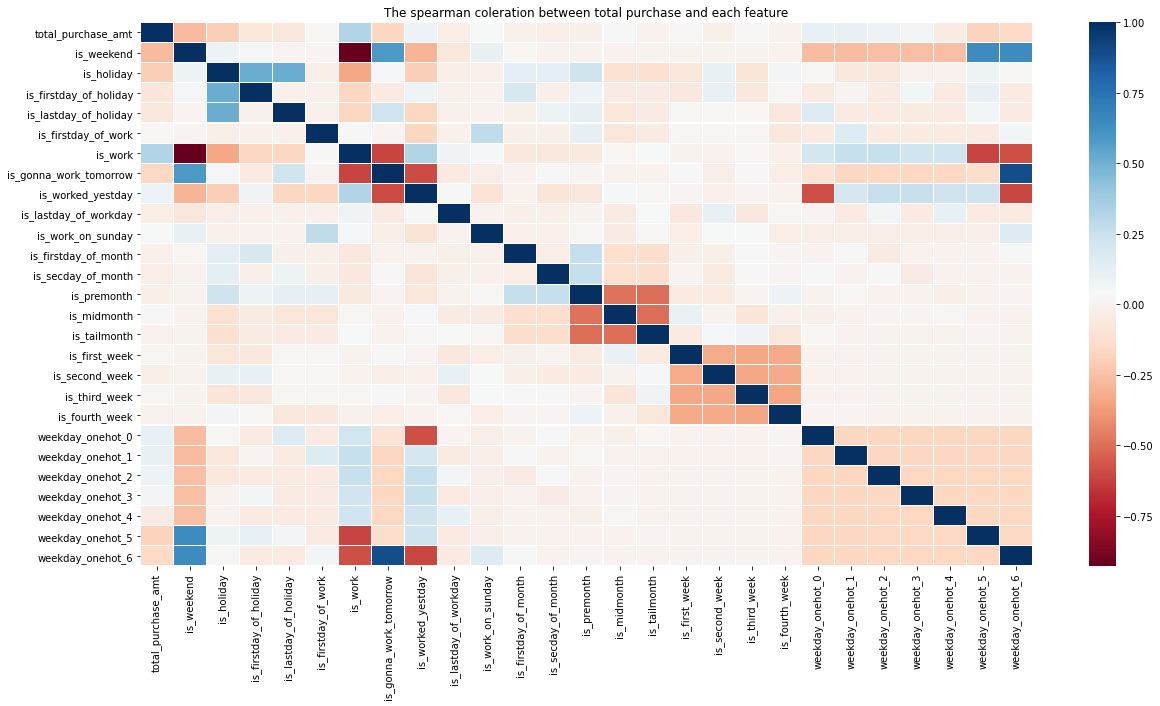

In [23]:
draw_correlation_heatmap(data_purchase_is, 'spearman')

In [24]:
# 剔除相关性较低的特征

temp = np.abs(data_purchase_is[[x for x in data_purchase_is.columns 
                       if x not in ['total_redeem_amt', 'date'] ]].corr('spearman')['total_purchase_amt'])
purchase_feature_low_correlation = list(set(temp[temp < 0.1].index))

In [25]:
purchase_feature_low_correlation

['is_tailmonth',
 'is_worked_yestday',
 'is_second_week',
 'is_midmonth',
 'weekday_onehot_4',
 'weekday_onehot_3',
 'is_premonth',
 'is_lastday_of_workday',
 'is_third_week',
 'is_first_week',
 'is_work_on_sunday',
 'is_firstday_of_work',
 'is_lastday_of_holiday',
 'is_secday_of_month',
 'is_firstday_of_holiday',
 'weekday_onehot_2',
 'is_firstday_of_month',
 'is_fourth_week']

In [26]:
data_purchase_is_drop = data_purchase_is[[x for x in data_purchase_is.columns 
                   if (x not in purchase_feature_low_correlation + purchase_feature_seems_useless)]]

In [28]:
data_purchase_is_drop.head()

,date,total_purchase_amt,total_redeem_amt,is_weekend,is_holiday,is_work,is_gonna_work_tomorrow,weekday_onehot_0,weekday_onehot_1,weekday_onehot_5,weekday_onehot_6
0,2013-07-01,32488348.0,5525022.0,0,0,1,0,1.0,0.0,0.0,0.0
1,2013-07-02,29037390.0,2554548.0,0,0,1,0,0.0,1.0,0.0,0.0
2,2013-07-03,27270770.0,5953867.0,0,0,1,0,0.0,0.0,0.0,0.0
3,2013-07-04,18321185.0,6410729.0,0,0,1,0,0.0,0.0,0.0,0.0
4,2013-07-05,11648749.0,2763587.0,0,0,1,0,0.0,0.0,0.0,0.0


### redeem

In [29]:
# 绘制箱型图

def draw_boxplot(data: pd.DataFrame)->None:
    f, axes = plt.subplots(7, 4, figsize=(18, 24))
    global date_indexs, labels
    count = 0
    for i in [x for x in data.columns if x not in date_indexs + labels + ['date']]:
        sns.boxenplot(x=i, y='total_redeem_amt', data=data, ax=axes[count // 4][count % 4])
        count += 1

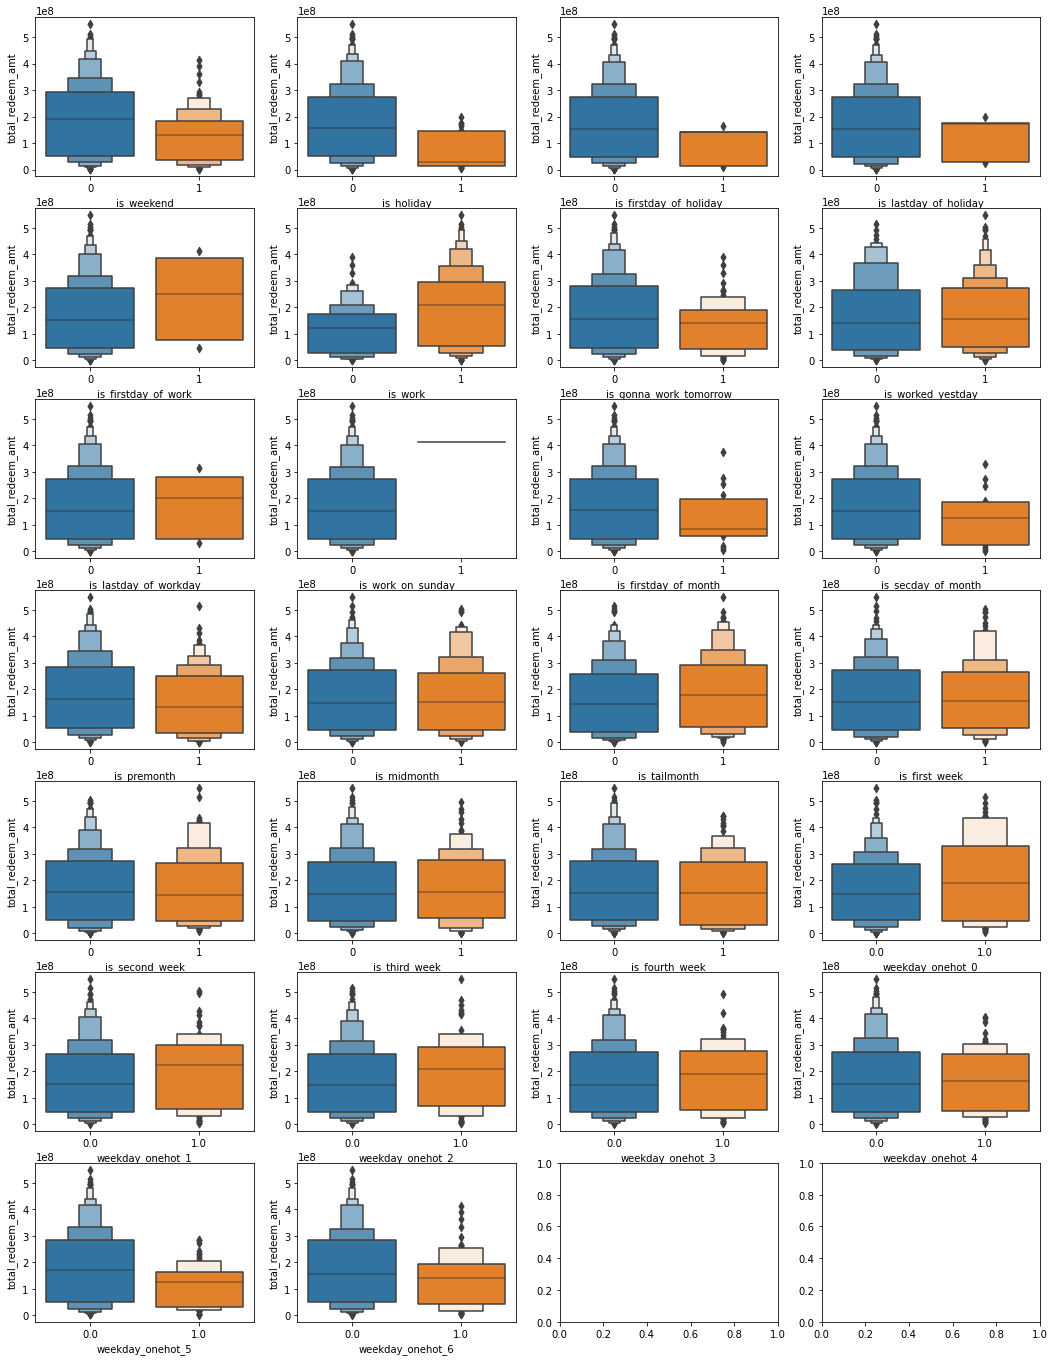

In [30]:
draw_boxplot(data_redeem_is)

In [31]:
## 剔除看起来较差的特征 (for_rate)

redeem_feature_seems_useless = [
      #样本量太少，建模时无效；但若确定这是一个有用规则，可以对结果做修正
      'is_midmonth',
      'is_first_week'
]

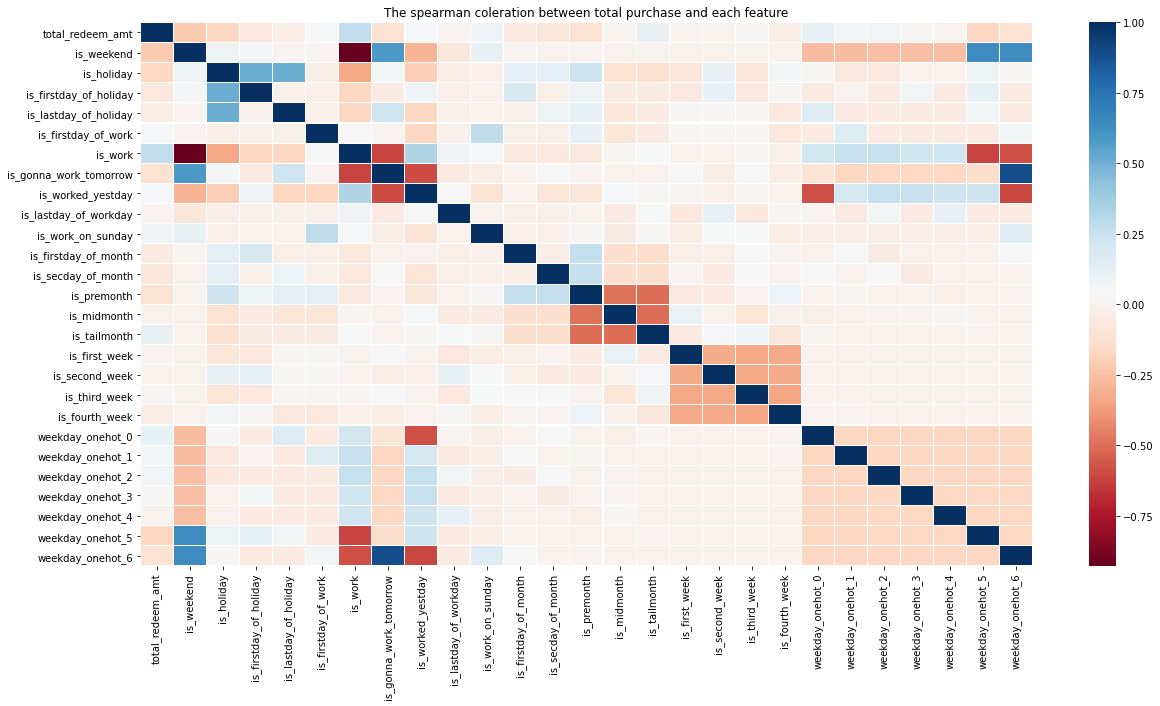

In [32]:
# 画相关性热力图

def draw_correlation_heatmap(data: pd.DataFrame, way:str = 'pearson')->None:
    feature = data.copy()
    plt.figure(figsize=(20,10))
    plt.title('The ' + way +' coleration between total purchase and each feature')
    sns.heatmap(feature[[x for x in feature.columns if x not in ['total_purchase_amt', 'date'] ]].corr(way),linecolor='white',
        linewidths=0.1,
        cmap="RdBu")

draw_correlation_heatmap(data_redeem_is, 'spearman')

# 剔除相关性较低的特征

temp = np.abs(data_redeem_is[[x for x in data_redeem_is.columns 
                       if x not in ['total_purchase_amt', 'date'] ]].corr('spearman')['total_redeem_amt'])
redeem_feature_low_correlation = list(set(temp[temp < 0.1].index))

In [33]:
redeem_feature_low_correlation

['is_worked_yestday',
 'is_second_week',
 'is_midmonth',
 'weekday_onehot_4',
 'weekday_onehot_3',
 'is_lastday_of_workday',
 'is_third_week',
 'is_first_week',
 'is_work_on_sunday',
 'is_firstday_of_work',
 'is_lastday_of_holiday',
 'is_secday_of_month',
 'is_firstday_of_holiday',
 'weekday_onehot_2',
 'is_firstday_of_month',
 'weekday_onehot_1',
 'is_fourth_week']

### 线下训练和验证 

In [34]:
data_redeem_is_drop = data_redeem_is[[x for x in data_redeem_is.columns 
                   if (x not in redeem_feature_low_correlation + redeem_feature_seems_useless)]]

In [35]:
# 分割数据集

def split_data_underline(data: pd.DataFrame)->pd.DataFrame:
    trainset = data[(datetime.date(2013,7,1) <= data['date'].dt.date) & (data['date'].dt.date < datetime.date(2014,8,1))]
    testset = data[(datetime.date(2014,8,1) <= data['date'].dt.date) & (data['date'].dt.date < datetime.date(2014,9,1))]
    return trainset, testset

def split_data_online(data: pd.DataFrame)->pd.DataFrame:
    trainset = data[(datetime.date(2013,7,1) <= data['date'].dt.date) & (data['date'].dt.date < datetime.date(2014,9,1))]
    testset = data[(datetime.date(2014,9,1) <= data['date'].dt.date) & (data['date'].dt.date < datetime.date(2014,10,1))]
    return trainset, testset

In [36]:
def generate_under_result(df: pd.DataFrame, feature: Iterable, model = LinearRegression(), target:str = 'total_purchase_amt')->Iterable:
    trainset, testset = split_data_underline(df)
    model.fit(X=trainset[feature], y=trainset[target])
    result_purchase_lr = model.predict(testset[feature])
    return result_purchase_lr

In [37]:
trainset, testset = split_data_underline(data_purchase_is_drop)
result_purchase_lr = generate_under_result(data_purchase_is_drop, [x for x in data_purchase_is_drop.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], target='total_purchase_amt')
result_redeem_lr = generate_under_result(data_redeem_is_drop, [x for x in data_redeem_is_drop.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], target='total_redeem_amt')

In [38]:
# 定义评价函数

def AE(y: Iterable, yhat: Iterable)->Iterable:
    return np.abs(y - yhat) / np.abs(y)

def total_AE(purchasehat: Iterable, redeemhat: Iterable, purchase: Iterable, redeem: Iterable, h: int = 0.3)->Iterable:
    return sum(map(lambda x : np.exp(-x/h)*10, AE(purchase, purchasehat))) * 0.45 + sum(map(lambda x : np.exp(-x/h)*10, AE(redeem, redeemhat))) * 0.55

In [51]:
def generate_under_result_with_valid(df: pd.DataFrame, feature: Iterable, model = LinearRegression(), target:str = 'total_purchase_amt')->Iterable:
    trainset, testset = split_data_underline(df)
    lr = model.fit(X=trainset[feature], y=trainset[target])
    result_purchase_lr = lr.predict(testset[feature])
    valid_result = []
    for i in range(3):
        trainset_temp = df[(datetime.date(2014,5+i,1) <= df['date'].dt.date) & (df['date'].dt.date < datetime.date(2014,6+i,1))]
        valid_purchase_lr = model.predict(trainset_temp[feature])
        valid_result.append(valid_purchase_lr)
    return result_purchase_lr,valid_result

In [52]:
result_purchase_lr,purchase_valid_result = generate_under_result_with_valid(data_purchase_is_drop, [x for x in data_purchase_is_drop.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], target='total_purchase_amt')
result_redeem_lr,redeem_valid_result = generate_under_result_with_valid(data_redeem_is_drop, [x for x in data_redeem_is_drop.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], target='total_redeem_amt')

In [59]:
# 线下训练集效果
for i in range(3):
    real_label_purchase = data_purchase_is_drop[(datetime.date(2014,5+i,1) <= data_purchase_is_drop['date'].dt.date) & (data_purchase_is_drop['date'].dt.date < datetime.date(2014,6+i,1))]['total_purchase_amt']
    real_label_redeem = data_redeem_is_drop[(datetime.date(2014,5+i,1) <= data_redeem_is_drop['date'].dt.date) & (data_redeem_is_drop['date'].dt.date < datetime.date(2014,6+i,1))]['total_redeem_amt']
    print(sum(AE(real_label_purchase,purchase_valid_result[i]))+sum(AE(real_label_redeem,redeem_valid_result[i])))

17.559183492006866
19.982659968583114
17.68143667474765


In [56]:
# 线下验证集
print(sum(AE(testset['total_purchase_amt'],result_purchase_lr))+sum(AE(testset['total_redeem_amt'],result_redeem_lr)))
total_AE(result_purchase_lr, result_redeem_lr, testset['total_purchase_amt'], testset['total_redeem_amt'])

15.322265410843535


150.59039261220624

In [93]:
# 全部is特征
result_purchase_lr,purchase_valid_result = generate_under_result_with_valid(data_purchase_is, [x for x in data_purchase_is.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], target='total_purchase_amt')
result_redeem_lr,redeem_valid_result = generate_under_result_with_valid(data_redeem_is, [x for x in data_redeem_is.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], target='total_redeem_amt')

In [94]:
# 线下训练集效果
for i in range(3):
    real_label_purchase = data_purchase_is[(datetime.date(2014,5+i,1) <= data_purchase_is['date'].dt.date) & (data_purchase_is['date'].dt.date < datetime.date(2014,6+i,1))]['total_purchase_amt']
    real_label_redeem = data_redeem_is[(datetime.date(2014,5+i,1) <= data_redeem_is['date'].dt.date) & (data_redeem_is['date'].dt.date < datetime.date(2014,6+i,1))]['total_redeem_amt']
    print(sum(AE(real_label_purchase,purchase_valid_result[i]))+sum(AE(real_label_redeem,redeem_valid_result[i])))

18.82047729357816
21.172889095813836
17.094196981052146


In [95]:
# 线下验证集
trainset, testset = split_data_underline(data_purchase_is)
print(sum(AE(testset['total_purchase_amt'],result_purchase_lr))+sum(AE(testset['total_redeem_amt'],result_redeem_lr)))
total_AE(result_purchase_lr, result_redeem_lr, testset['total_purchase_amt'], testset['total_redeem_amt'])

16.008170062194246


148.82025374614872

### 线上

In [61]:
# 生成线上结果

def generate_online_result(df: pd.DataFrame, feature: Iterable, model = LinearRegression(), target:str = 'total_purchase_amt')->Iterable:
    trainset, testset = split_data_online(df)
    model.fit(X=trainset[feature], y=trainset[target])
    result_purchase_lr = model.predict(testset[feature])
    return result_purchase_lr

In [62]:
result_purchase_lr = generate_online_result(data_purchase_is_drop, [x for x in data_purchase_is_drop.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], LinearRegression(),'total_purchase_amt')
result_redeem_lr = generate_online_result(data_redeem_is_drop, [x for x in data_redeem_is_drop.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], LinearRegression(),'total_redeem_amt')

In [63]:
trainset, testset = split_data_online(data_purchase_is)

In [64]:
# 生成线上提交的格式

def normalize_upload_file(result_purchase_lr: Iterable, result_redeem_lr: Iterable, testset: pd.DataFrame)->pd.DataFrame:
    testset['total_purchase_amt'] = result_purchase_lr
    testset['total_redeem_amt'] = result_redeem_lr
    online_upload = testset[['date','total_purchase_amt','total_redeem_amt']]
    online_upload['date'] = online_upload['date'].astype(str)
    online_upload['date'] = online_upload['date'].str.replace('-','')
    return online_upload

In [65]:
normalize_upload_file(result_purchase_lr, result_redeem_lr, testset).to_csv('20210902_all_is_predict.csv',index=False,header=None)

## 加dis特征

In [66]:
data_purchase_dis_feature = [x for x in data_purchase.columns if (x not in date_indexs + labels + ['date']) & ('dis' in x)]

In [67]:
data_redeem_dis_feature = [x for x in data_redeem.columns if (x not in date_indexs + labels + ['date']) & ('dis' in x)]

In [68]:
data_purchase_dis = data_purchase[['total_purchase_amt']+data_purchase_dis_feature]
data_redeem_dis = data_redeem[['total_redeem_amt']+data_redeem_dis_feature]

### purchase

In [69]:
# 画点线

def draw_point_feature(data: pd.DataFrame)->None:
    feature = data.copy()
    f, axes = plt.subplots(data.shape[1] // 3, 3, figsize=(30, data.shape[1] // 3 * 4))
    count = 0
    for i in [x for x in feature.columns if (x not in date_indexs + labels + ['date'])]:
        sns.pointplot(x=i, y="total_purchase_amt",
                markers=["^", "o"], linestyles=["-", "--"],
                kind="point", data=feature, ax=axes[count // 3][count % 3] if data.shape[1] > 3 else axes[count])
        count += 1

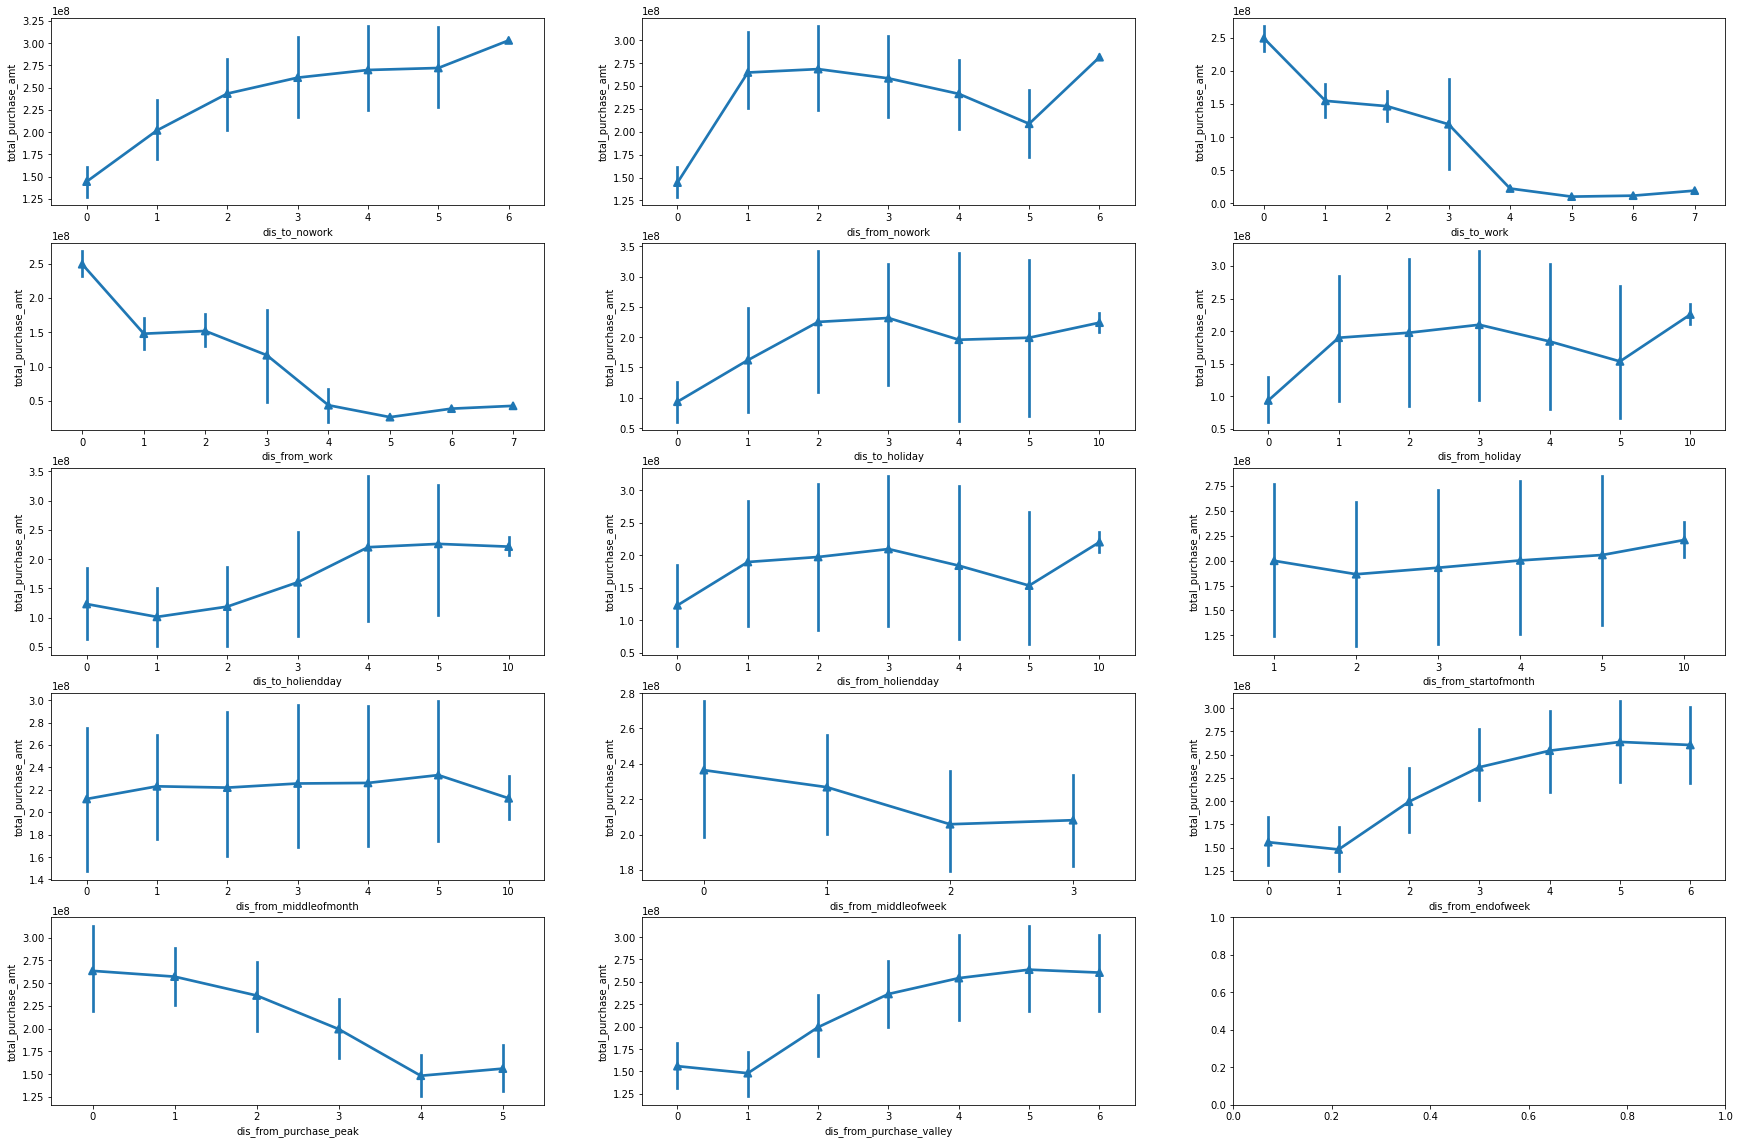

In [70]:
draw_point_feature(data_purchase_dis)

In [71]:
## 剔除看起来用处不大的特征
purchase_feature_seems_useless = [
                                  #即使做了处理，但方差太大，不可信，规律不明显
                                  'dis_to_holiday',
                                'dis_from_holiday',
                                'dis_from_holiendday',
                                  #方差太大，不可信
                                  'dis_from_startofmonth',
                                  #方差太大，不可信
                                  'dis_from_middleofmonth'
]

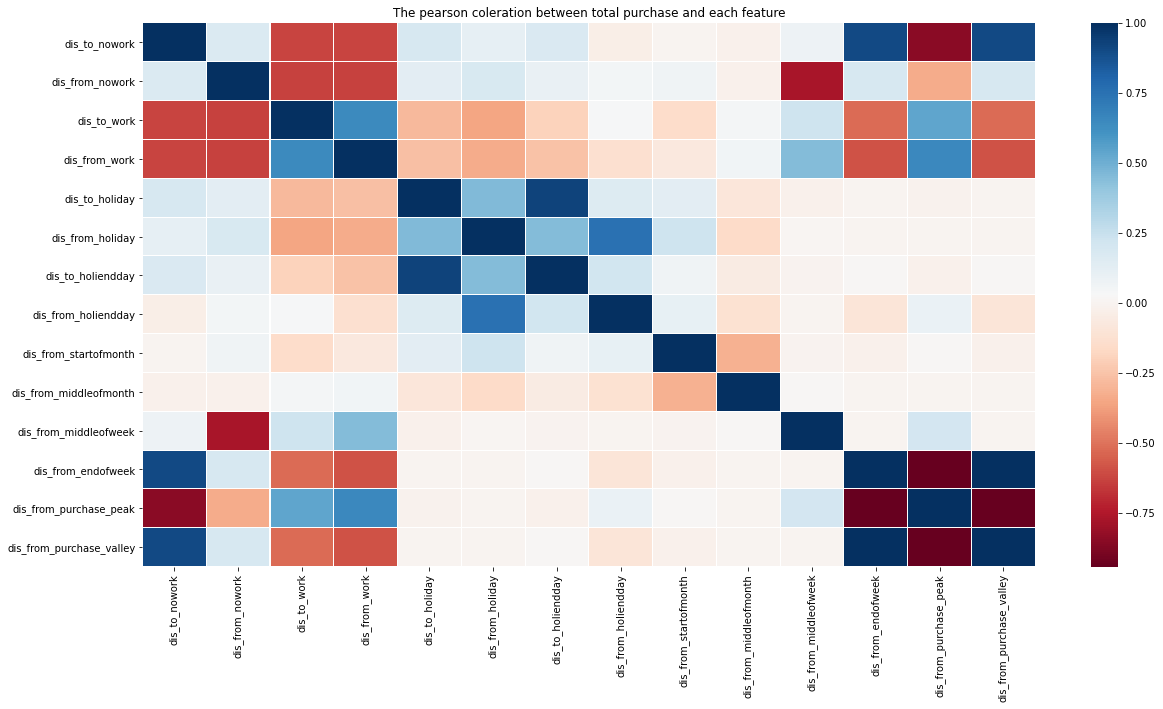

In [72]:
# 画出相关性图

draw_correlation_heatmap(data_purchase[['total_purchase_amt']+data_purchase_dis_feature])

In [73]:
# 剔除相关性较差的特征

temp = np.abs(data_purchase_dis[[x for x in data_purchase_dis.columns 
                       if ('dis' in x) | (x in ['total_purchase_amt']) ]].corr()['total_purchase_amt'])
purchase_feature_low_correlation = list(set(temp[temp < 0.1].index) )

In [74]:
purchase_feature_low_correlation

['dis_from_middleofmonth',
 'dis_from_middleofweek',
 'dis_from_startofmonth',
 'dis_from_holiendday']

### redeem

In [75]:
# 画点线

def draw_point_feature(data: pd.DataFrame)->None:
    feature = data.copy()
    f, axes = plt.subplots(data.shape[1] // 3, 3, figsize=(30, data.shape[1] // 3 * 4))
    count = 0
    for i in [x for x in feature.columns if (x not in date_indexs + labels + ['date'])]:
        sns.pointplot(x=i, y="total_redeem_amt",
                markers=["^", "o"], linestyles=["-", "--"],
                kind="point", data=feature, ax=axes[count // 3][count % 3] if data.shape[1] > 3 else axes[count])
        count += 1

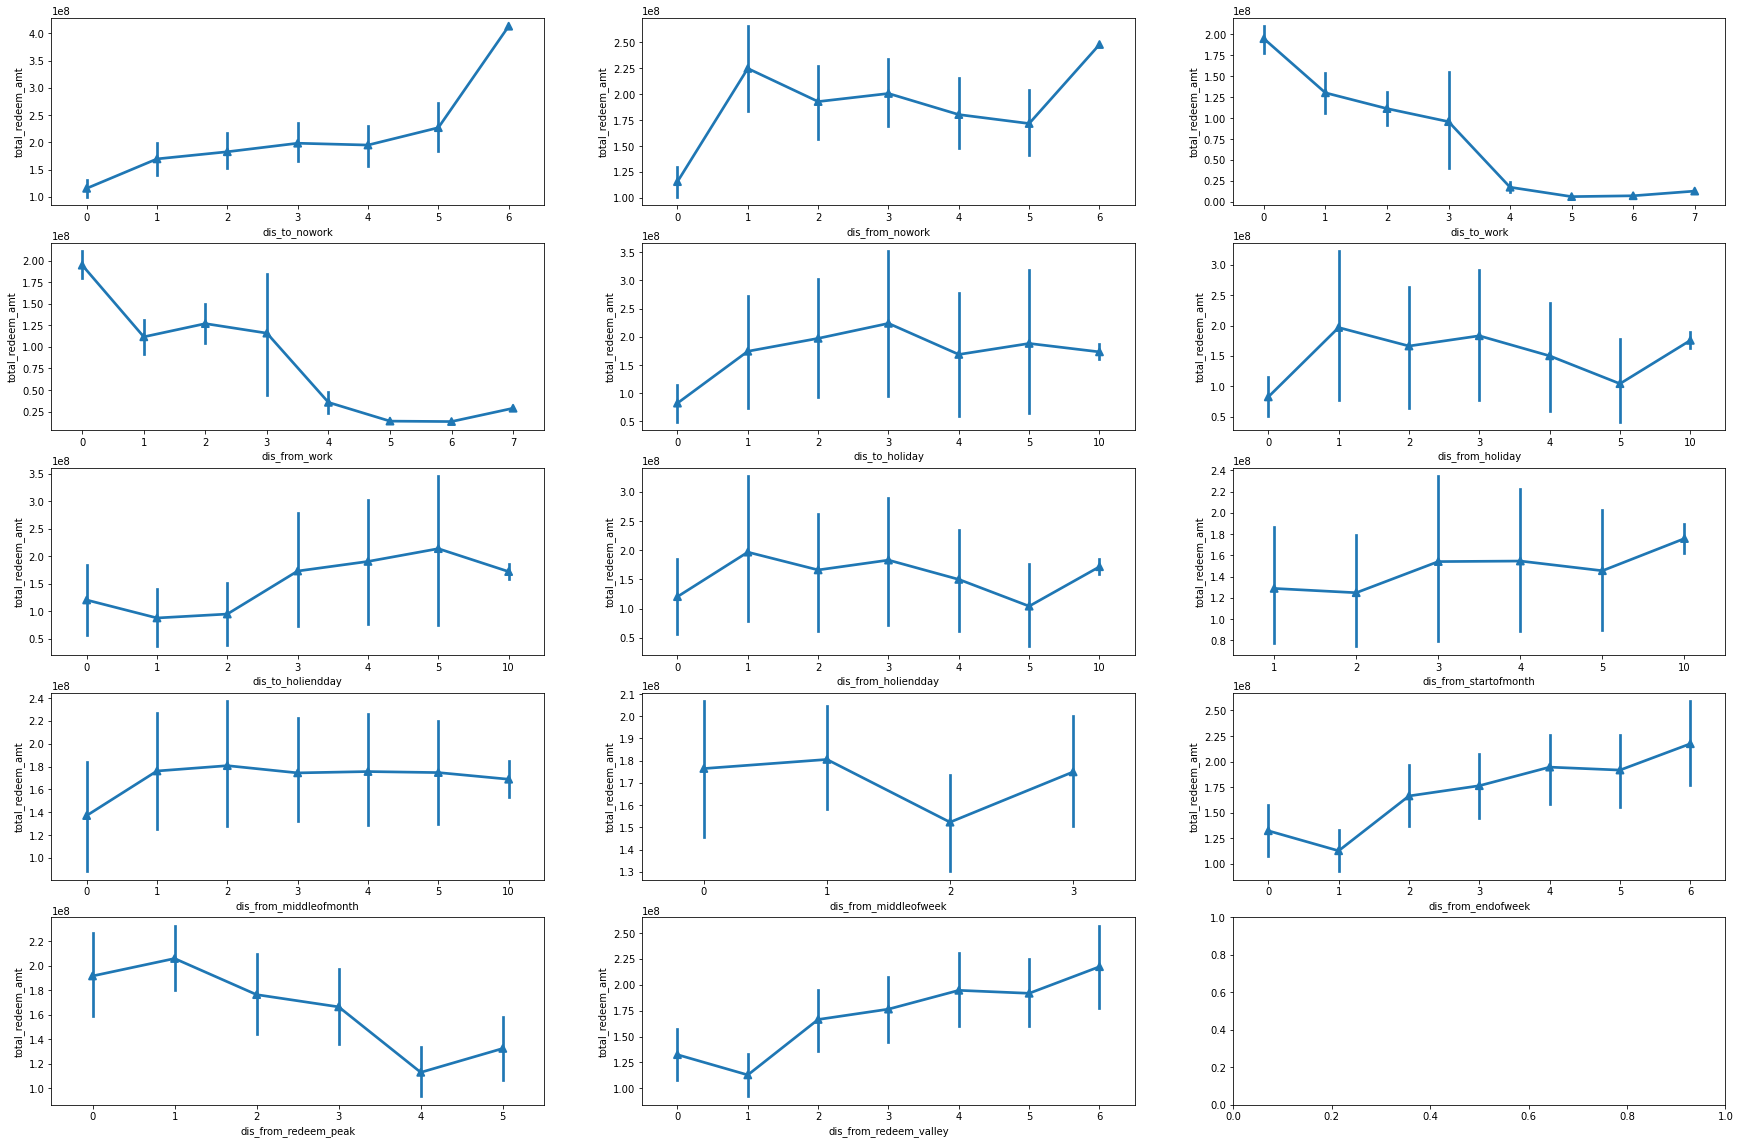

In [76]:
# 画处理后的点线图

draw_point_feature(data_redeem_dis)

In [77]:
## 剔除看起来用处不大的特征
redeem_feature_seems_useless = [
                                  #即使做了处理，但方差太大，不可信，规律不明显
                                  'dis_to_holiday',
                                 'dis_from_holiday',
                                'dis_from_holiendday',
                                  #方差太大，不可信
                                  'dis_from_startofmonth',
                                  #方差太大，不可信
                                  'dis_from_middleofmonth',
                                  'dis_from_middleofweek'
]

In [78]:
# 剔除相关性较差的特征

temp = np.abs(data_redeem_dis[[x for x in data_redeem_dis.columns 
                       if ('dis' in x) | (x in ['total_redeem_amt']) ]].corr()['total_redeem_amt'])
redeem_feature_low_correlation = list(set(temp[temp < 0.1].index) )

In [79]:
redeem_feature_low_correlation

['dis_to_holiendday',
 'dis_from_middleofmonth',
 'dis_to_holiday',
 'dis_from_holiendday',
 'dis_from_middleofweek']

In [80]:
data_purchase_dis_drop = data_purchase_dis[[x for x in data_purchase_dis.columns 
                   if (x not in purchase_feature_low_correlation + purchase_feature_seems_useless)]]

In [81]:
data_redeem_dis_drop = data_redeem_dis[[x for x in data_redeem_dis.columns 
                   if (x not in redeem_feature_low_correlation + redeem_feature_seems_useless)]]

In [82]:
data_purchase_is_drop.head()

,date,total_purchase_amt,total_redeem_amt,is_weekend,is_holiday,is_work,is_gonna_work_tomorrow,weekday_onehot_0,weekday_onehot_1,weekday_onehot_5,weekday_onehot_6
0,2013-07-01,32488348.0,5525022.0,0,0,1,0,1.0,0.0,0.0,0.0
1,2013-07-02,29037390.0,2554548.0,0,0,1,0,0.0,1.0,0.0,0.0
2,2013-07-03,27270770.0,5953867.0,0,0,1,0,0.0,0.0,0.0,0.0
3,2013-07-04,18321185.0,6410729.0,0,0,1,0,0.0,0.0,0.0,0.0
4,2013-07-05,11648749.0,2763587.0,0,0,1,0,0.0,0.0,0.0,0.0


In [83]:
data_purchase_dis_drop.head()

,total_purchase_amt,dis_to_nowork,dis_from_nowork,dis_to_work,dis_from_work,dis_to_holiendday,dis_from_endofweek,dis_from_purchase_peak,dis_from_purchase_valley
0,32488348.0,5,1,0,0,10,6,1,6
1,29037390.0,4,2,0,0,10,5,0,5
2,27270770.0,3,3,0,0,10,4,1,4
3,18321185.0,2,4,0,0,10,3,2,3
4,11648749.0,1,5,0,0,10,2,3,2


In [86]:
data_purchase_is_dis = pd.concat([data_purchase_is_drop,data_purchase_dis_drop.iloc[:,1:]],axis=1)

In [87]:
data_purchase_is_dis.head()

,date,total_purchase_amt,total_redeem_amt,is_weekend,is_holiday,is_work,is_gonna_work_tomorrow,weekday_onehot_0,weekday_onehot_1,weekday_onehot_5,weekday_onehot_6,dis_to_nowork,dis_from_nowork,dis_to_work,dis_from_work,dis_to_holiendday,dis_from_endofweek,dis_from_purchase_peak,dis_from_purchase_valley
0,2013-07-01,32488348.0,5525022.0,0,0,1,0,1.0,0.0,0.0,0.0,5,1,0,0,10,6,1,6
1,2013-07-02,29037390.0,2554548.0,0,0,1,0,0.0,1.0,0.0,0.0,4,2,0,0,10,5,0,5
2,2013-07-03,27270770.0,5953867.0,0,0,1,0,0.0,0.0,0.0,0.0,3,3,0,0,10,4,1,4
3,2013-07-04,18321185.0,6410729.0,0,0,1,0,0.0,0.0,0.0,0.0,2,4,0,0,10,3,2,3
4,2013-07-05,11648749.0,2763587.0,0,0,1,0,0.0,0.0,0.0,0.0,1,5,0,0,10,2,3,2


In [88]:
data_redeem_is_dis = pd.concat([data_redeem_is_drop,data_redeem_dis_drop.iloc[:,1:-1]],axis=1)

In [89]:
data_redeem_is_dis.head()

,date,total_purchase_amt,total_redeem_amt,is_weekend,is_holiday,is_work,is_gonna_work_tomorrow,is_premonth,is_tailmonth,weekday_onehot_0,weekday_onehot_5,weekday_onehot_6,dis_to_nowork,dis_from_nowork,dis_to_work,dis_from_work,dis_from_endofweek,dis_from_redeem_peak
0,2013-07-01,32488348.0,5525022.0,0,0,1,0,1,0,1.0,0.0,0.0,5,1,0,0,6,1
1,2013-07-02,29037390.0,2554548.0,0,0,1,0,1,0,0.0,0.0,0.0,4,2,0,0,5,0
2,2013-07-03,27270770.0,5953867.0,0,0,1,0,1,0,0.0,0.0,0.0,3,3,0,0,4,1
3,2013-07-04,18321185.0,6410729.0,0,0,1,0,1,0,0.0,0.0,0.0,2,4,0,0,3,2
4,2013-07-05,11648749.0,2763587.0,0,0,1,0,1,0,0.0,0.0,0.0,1,5,0,0,2,3


### 线下训练

In [90]:
result_purchase_lr,purchase_valid_result = generate_under_result_with_valid(data_purchase_is_dis, [x for x in data_purchase_is_dis.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], target='total_purchase_amt')
result_redeem_lr,redeem_valid_result = generate_under_result_with_valid(data_redeem_is_dis, [x for x in data_redeem_is_dis.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], target='total_redeem_amt')

In [91]:
# 线下训练集效果
for i in range(3):
    real_label_purchase = data_purchase_is_dis[(datetime.date(2014,5+i,1) <= data_purchase_is_dis['date'].dt.date) & (data_purchase_is_dis['date'].dt.date < datetime.date(2014,6+i,1))]['total_purchase_amt']
    real_label_redeem = data_redeem_is_dis[(datetime.date(2014,5+i,1) <= data_redeem_is_dis['date'].dt.date) & (data_redeem_is_dis['date'].dt.date < datetime.date(2014,6+i,1))]['total_redeem_amt']
    print(sum(AE(real_label_purchase,purchase_valid_result[i]))+sum(AE(real_label_redeem,redeem_valid_result[i])))

13.926229229920569
19.325002325513296
16.33307230805023


In [92]:
# 线下验证集
trainset, testset = split_data_underline(data_purchase_is_dis)
print(sum(AE(testset['total_purchase_amt'],result_purchase_lr))+sum(AE(testset['total_redeem_amt'],result_redeem_lr)))
total_AE(result_purchase_lr, result_redeem_lr, testset['total_purchase_amt'], testset['total_redeem_amt'])

15.038859607620424


153.50115452154898

### 原来挑选的最好特征组合

In [116]:
data_purchase_is_dis_time = pd.read_csv('data_purchase_is_dis_time.csv')
data_purchase_is_dis_time['date'] = pd.to_datetime(data_purchase_is_dis_time['date'])
data_redeem_is_dis_time = pd.read_csv('data_redeem_is_dis_time.csv')
data_redeem_is_dis_time['date'] = pd.to_datetime(data_redeem_is_dis_time['date'])

In [117]:
data_purchase_is_dis_time.head()

,date,total_purchase_amt,total_redeem_amt,is_weekend,is_holiday,is_firstday_of_holiday,is_lastday_of_holiday,is_work,is_gonna_work_tomorrow,is_worked_yestday,...,dis_from_middleofweek,dis_from_endofweek,dis_from_purchase_peak,dis_from_purchase_valley,purchase_weekday_median,purchase_weekday_mean,purchase_weekday_min,purchase_weekday_max,purchase_weekday_std,purchase_weekday_skew
0,2014-04-01,453320585.0,277429358.0,0,0,0,0,1,0,0,...,2,5,0,5,303834661.5,3.060830e+08,158219402.0,392838756.0,5.412342e+07,0.357456
1,2014-04-02,355347118.0,272612066.0,0,0,0,0,1,0,1,...,1,4,1,4,303834661.5,3.060830e+08,158219402.0,392838756.0,5.412342e+07,0.357456
2,2014-04-03,363877120.0,266605457.0,0,0,0,0,1,0,1,...,0,3,2,3,303834661.5,3.060830e+08,158219402.0,392838756.0,5.412342e+07,0.357456
3,2014-04-04,251895894.0,200192637.0,0,0,0,0,1,0,1,...,1,2,3,2,303834661.5,3.060830e+08,158219402.0,392838756.0,5.412342e+07,0.357456
4,2014-04-05,202336542.0,163199682.0,1,1,1,0,0,0,1,...,2,1,4,1,303834661.5,3.060830e+08,158219402.0,392838756.0,5.412342e+07,0.357456


In [118]:
data_redeem_is_dis_time.head()

,date,total_purchase_amt,total_redeem_amt,is_weekend,is_holiday,is_firstday_of_holiday,is_lastday_of_holiday,is_firstday_of_work,is_work,is_gonna_work_tomorrow,...,dis_from_holiday,dis_to_holiendday,dis_from_endofweek,dis_from_redeem_peak,dis_from_redeem_valley,redeem_weekday_median,redeem_weekday_mean,redeem_weekday_min,redeem_weekday_max,redeem_weekday_skew
0,2014-03-31,398884905.0,423852634.0,0,0,0,0,0,1,0,...,1,10,6,1,6,273187499.0,2.739258e+08,143362755.0,413222034.0,0.874362
1,2014-04-01,453320585.0,277429358.0,0,0,0,0,0,1,0,...,2,10,5,0,5,273187499.0,2.739258e+08,143362755.0,413222034.0,0.874362
2,2014-04-02,355347118.0,272612066.0,0,0,0,0,0,1,0,...,3,5,4,1,4,273187499.0,2.739258e+08,143362755.0,413222034.0,0.874362
3,2014-04-03,363877120.0,266605457.0,0,0,0,0,0,1,0,...,4,4,3,2,3,273187499.0,2.739258e+08,143362755.0,413222034.0,0.874362
4,2014-04-04,251895894.0,200192637.0,0,0,0,0,0,1,0,...,5,3,2,3,2,273187499.0,2.739258e+08,143362755.0,413222034.0,0.874362


In [119]:
purchase_features = data_purchase_is_dis_time.iloc[:,3:].columns
print(purchase_features)

Index(['is_weekend', 'is_holiday', 'is_firstday_of_holiday',
       'is_lastday_of_holiday', 'is_work', 'is_gonna_work_tomorrow',
       'is_worked_yestday', 'is_premonth', 'is_tailmonth', 'is_second_week',
       'is_third_week', 'weekday_onehot_0', 'weekday_onehot_1',
       'weekday_onehot_2', 'weekday_onehot_3', 'weekday_onehot_4',
       'weekday_onehot_5', 'weekday_onehot_6', 'dis_to_nowork',
       'dis_from_nowork', 'dis_to_work', 'dis_from_work', 'dis_to_holiendday',
       'dis_from_holiendday', 'dis_from_middleofweek', 'dis_from_endofweek',
       'dis_from_purchase_peak', 'dis_from_purchase_valley',
       'purchase_weekday_median', 'purchase_weekday_mean',
       'purchase_weekday_min', 'purchase_weekday_max', 'purchase_weekday_std',
       'purchase_weekday_skew'],
      dtype='object')


In [120]:
redeem_features = data_redeem_is_dis_time.iloc[:,3:].columns
print(redeem_features)

Index(['is_weekend', 'is_holiday', 'is_firstday_of_holiday',
       'is_lastday_of_holiday', 'is_firstday_of_work', 'is_work',
       'is_gonna_work_tomorrow', 'is_secday_of_month', 'is_midmonth',
       'is_tailmonth', 'weekday_onehot_0', 'weekday_onehot_1',
       'weekday_onehot_2', 'weekday_onehot_5', 'weekday_onehot_6',
       'dis_to_nowork', 'dis_from_nowork', 'dis_to_work', 'dis_from_work',
       'dis_from_holiday', 'dis_to_holiendday', 'dis_from_endofweek',
       'dis_from_redeem_peak', 'dis_from_redeem_valley',
       'redeem_weekday_median', 'redeem_weekday_mean', 'redeem_weekday_min',
       'redeem_weekday_max', 'redeem_weekday_skew'],
      dtype='object')


In [157]:
data_purchase = data_purchase[['date','total_purchase_amt','total_redeem_amt']+[x for x in purchase_features]]
data_redeem = data_redeem[['date','total_purchase_amt','total_redeem_amt']+[x for x in redeem_features]]

In [158]:
data_purchase = data_purchase.iloc[:,:-6]

In [159]:
data_purchase.head()

,date,total_purchase_amt,total_redeem_amt,is_weekend,is_holiday,is_firstday_of_holiday,is_lastday_of_holiday,is_work,is_gonna_work_tomorrow,is_worked_yestday,...,dis_to_nowork,dis_from_nowork,dis_to_work,dis_from_work,dis_to_holiendday,dis_from_holiendday,dis_from_middleofweek,dis_from_endofweek,dis_from_purchase_peak,dis_from_purchase_valley
0,2013-07-01,32488348.0,5525022.0,0,0,0,0,1,0,0,...,5,1,0,0,10,1,3,6,1,6
1,2013-07-02,29037390.0,2554548.0,0,0,0,0,1,0,0,...,4,2,0,0,10,2,2,5,0,5
2,2013-07-03,27270770.0,5953867.0,0,0,0,0,1,0,1,...,3,3,0,0,10,3,1,4,1,4
3,2013-07-04,18321185.0,6410729.0,0,0,0,0,1,0,1,...,2,4,0,0,10,4,0,3,2,3
4,2013-07-05,11648749.0,2763587.0,0,0,0,0,1,0,1,...,1,5,0,0,10,5,1,2,3,2


In [160]:
data_redeem = data_redeem.iloc[:,:-5]

In [161]:
data_redeem.head()

,date,total_purchase_amt,total_redeem_amt,is_weekend,is_holiday,is_firstday_of_holiday,is_lastday_of_holiday,is_firstday_of_work,is_work,is_gonna_work_tomorrow,...,weekday_onehot_6,dis_to_nowork,dis_from_nowork,dis_to_work,dis_from_work,dis_from_holiday,dis_to_holiendday,dis_from_endofweek,dis_from_redeem_peak,dis_from_redeem_valley
0,2013-07-01,32488348.0,5525022.0,0,0,0,0,0,1,0,...,0.0,5,1,0,0,1,10,6,1,6
1,2013-07-02,29037390.0,2554548.0,0,0,0,0,0,1,0,...,0.0,4,2,0,0,2,10,5,0,5
2,2013-07-03,27270770.0,5953867.0,0,0,0,0,0,1,0,...,0.0,3,3,0,0,3,10,4,1,4
3,2013-07-04,18321185.0,6410729.0,0,0,0,0,0,1,0,...,0.0,2,4,0,0,4,10,3,2,3
4,2013-07-05,11648749.0,2763587.0,0,0,0,0,0,1,0,...,0.0,1,5,0,0,5,10,2,3,2


In [162]:
result_purchase_lr,purchase_valid_result = generate_under_result_with_valid(data_purchase, [x for x in data_purchase.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], target='total_purchase_amt')
result_redeem_lr,redeem_valid_result = generate_under_result_with_valid(data_redeem, [x for x in data_redeem.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], target='total_redeem_amt')

# 线下训练集效果
for i in range(3):
    real_label_purchase = data_purchase[(datetime.date(2014,5+i,1) <= data_purchase['date'].dt.date) & (data_purchase['date'].dt.date < datetime.date(2014,6+i,1))]['total_purchase_amt']
    real_label_redeem = data_redeem_is_dis[(datetime.date(2014,5+i,1) <= data_redeem['date'].dt.date) & (data_redeem['date'].dt.date < datetime.date(2014,6+i,1))]['total_redeem_amt']
    print(sum(AE(real_label_purchase,purchase_valid_result[i]))+sum(AE(real_label_redeem,redeem_valid_result[i])))
    

13.237286925576008
20.149918781103114
16.053288839145374


In [163]:
trainset, testset = split_data_underline(data_purchase)

In [164]:
# 线下验证集
trainset, testset = split_data_underline(data_purchase_is_dis)
print(sum(AE(testset['total_purchase_amt'],result_purchase_lr))+sum(AE(testset['total_redeem_amt'],result_redeem_lr)))
total_AE(result_purchase_lr, result_redeem_lr, testset['total_purchase_amt'], testset['total_redeem_amt'])

14.911163625811525


155.4416004666659

### 线上 

In [169]:
result_purchase_lr = generate_online_result(data_purchase, [x for x in data_purchase.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], LinearRegression(),'total_purchase_amt')
result_redeem_lr = generate_online_result(data_redeem, [x for x in data_redeem.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], LinearRegression(),'total_redeem_amt')

In [170]:
trainset, testset = split_data_online(data_purchase)

In [171]:
normalize_upload_file(result_purchase_lr, result_redeem_lr, testset).to_csv('20210902_all_best_predict.csv',index=False,header=None)

# 模型选择

调参资料：
- https://www.cnblogs.com/wj-1314/p/10422159.html

## gbdt

### 线下 

purchase

> 预测purchase和redeem应该分别是两个模型。

In [172]:
trainset, testset = split_data_online(data_purchase_is_dis_time)

In [173]:
purchase_features = [x for x in data_purchase_is_dis_time.columns if x not in ['total_purchase_amt','total_redeem_amt','date']]
X = trainset[purchase_features]
y = trainset['total_purchase_amt']

In [175]:
from sklearn.model_selection import GridSearchCV

In [197]:
param_dist = {
    'n_estimators':range(10,81,10),
        'max_depth':range(2,10,1),
        'learning_rate':np.linspace(0.01,1,10),
        'max_features':range(6,20,2)
        }
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(), 
                       param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=-1,cv=5)
gsearch1.fit(X,y)
print(gsearch1.best_params_)
model = gsearch1.best_estimator_ = gsearch1.best_estimator_

{'max_features': 7}


In [190]:
param_test1 = {'max_features':range(7,20,2)}
#  'n_estimators':range(10,81,10)
#  'max_depth':range(1,11,1),
# 'learning_rate':np.linspace(0.01,2,20),
# min_samples_split=300,min_samples_leaf=20,subsample=0.8,max_features='sqrt',random_state=10
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, n_estimators=20,
                                  max_depth=2,max_features=9), 
                       param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=-1,cv=5)
gsearch1.fit(X,y)
gsearch1.best_params_, gsearch1.best_estimator_

({'max_features': 9},
 GradientBoostingRegressor(max_depth=2, max_features=9, n_estimators=20))

In [191]:
model = gsearch1.best_estimator_

In [198]:
result_purchase_lr,purchase_valid_result = generate_under_result_with_valid(data_purchase_is_dis_time, [x for x in data_purchase_is_dis_time.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], model,target='total_purchase_amt')
result_redeem_lr,redeem_valid_result = generate_under_result_with_valid(data_redeem_is_dis_time, [x for x in data_redeem_is_dis_time.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], model,target='total_redeem_amt')

# 线下训练集效果
for i in range(3):
    real_label_purchase = data_purchase_is_dis_time[(datetime.date(2014,5+i,1) <= data_purchase_is_dis_time['date'].dt.date) & (data_purchase_is_dis_time['date'].dt.date < datetime.date(2014,6+i,1))]['total_purchase_amt']
    real_label_redeem = data_redeem_is_dis_time[(datetime.date(2014,5+i,1) <= data_redeem_is_dis_time['date'].dt.date) & (data_redeem_is_dis_time['date'].dt.date < datetime.date(2014,6+i,1))]['total_redeem_amt']
    print(sum(AE(real_label_purchase,purchase_valid_result[i]))+sum(AE(real_label_redeem,redeem_valid_result[i])))

8.228552337014673
9.394082465681446
9.264153909272064


In [199]:
# 线下验证集
trainset, testset = split_data_underline(data_purchase_is_dis_time)
print(sum(AE(testset['total_purchase_amt'],result_purchase_lr))+sum(AE(testset['total_redeem_amt'],result_redeem_lr)))
total_AE(result_purchase_lr, result_redeem_lr, testset['total_purchase_amt'], testset['total_redeem_amt'])

11.972178865407518


177.9296111161906

### 线上

In [194]:
result_purchase_lr = generate_online_result(data_purchase_is_dis_time, [x for x in data_purchase_is_dis_time.columns if x not in ['total_purchase_amt','total_redeem_amt','date']],model,'total_purchase_amt')
result_redeem_lr = generate_online_result(data_redeem_is_dis_time, [x for x in data_redeem_is_dis_time.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], model,'total_redeem_amt')

trainset, testset = split_data_online(data_purchase_is_dis_time)
normalize_upload_file(result_purchase_lr, result_redeem_lr, testset).to_csv('20210902_is_dis_time_gbdt_predict.csv',index=False,header=None)

113

## xgboost 

### is_dis_time特征

####  purchase

In [245]:
trainset, testset = split_data_online(data_purchase_is_dis_time)
purchase_features = [x for x in data_purchase_is_dis_time.columns if x not in ['total_purchase_amt','total_redeem_amt','date']]
X = trainset[purchase_features]
y = trainset['total_purchase_amt']

In [246]:
param_dist = {
        'n_estimators':range(10,80,5),
        'max_depth':range(2,10,1),
        'learning_rate':np.linspace(0.01,1,10),
        'max_features':range(7,20,2)
        }

In [247]:
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(), 
                       param_grid = param_dist, scoring='neg_mean_squared_error',n_jobs=-1,cv=5)
gsearch1.fit(X,y)
print(gsearch1.best_params_)
model1_best = gsearch1.best_estimator_
# {'learning_rate': 0.34, 'max_depth': 2, 'max_features': 15, 'n_estimators': 10}

{'learning_rate': 0.78, 'max_depth': 2, 'max_features': 7, 'n_estimators': 10}


In [248]:
result_purchase_lr,purchase_valid_result = generate_under_result_with_valid(data_purchase_is_dis_time, [x for x in data_purchase_is_dis_time.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], model1_best,target='total_purchase_amt')

#### redeem

In [249]:
trainset, testset = split_data_online(data_redeem_is_dis_time)
redeem_features = [x for x in data_redeem_is_dis_time.columns if x not in ['total_purchase_amt','total_redeem_amt','date']]
X = trainset[redeem_features]
y = trainset['total_redeem_amt']

In [250]:
param_dist = {
        'n_estimators':range(10,80,5),
        'max_depth':range(2,10,1),
        'learning_rate':np.linspace(0.01,1,10),
        'max_features':range(7,20,2)
        }

In [251]:
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(), 
                       param_grid = param_dist, scoring='neg_mean_squared_error',n_jobs=-1,cv=5)
gsearch1.fit(X,y)
print(gsearch1.best_params_)
model2_best = gsearch1.best_estimator_
# {'learning_rate': 0.34, 'max_depth': 2, 'max_features': 15, 'n_estimators': 10}

{'learning_rate': 0.23, 'max_depth': 3, 'max_features': 19, 'n_estimators': 10}


In [252]:
result_redeem_lr,redeem_valid_result = generate_under_result_with_valid(data_redeem_is_dis_time, [x for x in data_redeem_is_dis_time.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], model2_best,target='total_redeem_amt')

In [253]:
# 线下训练集效果
for i in range(3):
    real_label_purchase = data_purchase_is_dis_time[(datetime.date(2014,5+i,1) <= data_purchase_is_dis_time['date'].dt.date) & (data_purchase_is_dis_time['date'].dt.date < datetime.date(2014,6+i,1))]['total_purchase_amt']
    real_label_redeem = data_redeem_is_dis_time[(datetime.date(2014,5+i,1) <= data_redeem_is_dis_time['date'].dt.date) & (data_redeem_is_dis_time['date'].dt.date < datetime.date(2014,6+i,1))]['total_redeem_amt']
    print(sum(AE(real_label_purchase,purchase_valid_result[i]))+sum(AE(real_label_redeem,redeem_valid_result[i])))

6.294722823002392
7.5412865119212515
7.182601890229926


In [254]:
# 线下验证集
trainset, testset = split_data_underline(data_purchase_is_dis_time)
print(sum(AE(testset['total_purchase_amt'],result_purchase_lr))+sum(AE(testset['total_redeem_amt'],result_redeem_lr)))
total_AE(result_purchase_lr, result_redeem_lr, testset['total_purchase_amt'], testset['total_redeem_amt'])

10.841244953778538


190.80804364338417

In [255]:
result_purchase_lr = generate_online_result(data_purchase_is_dis_time, [x for x in data_purchase_is_dis_time.columns if x not in ['total_purchase_amt','total_redeem_amt','date']],model1_best,'total_purchase_amt')
result_redeem_lr = generate_online_result(data_redeem_is_dis_time, [x for x in data_redeem_is_dis_time.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], model2_best,'total_redeem_amt')

trainset, testset = split_data_online(data_purchase_is_dis_time)
normalize_upload_file(result_purchase_lr, result_redeem_lr, testset).to_csv('20210903_is_dis_time_xgbt_predict.csv',index=False,header=None)

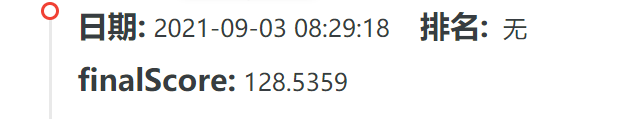

有时候把验证集降下来还是没有提升分数。

### 所有特征

In [221]:
data_purchase = pd.read_csv('The-Purchase-and-Redemption-Forecast-Challenge-baseline/purchase_all_feature.csv')
data_purchase['date'] = pd.to_datetime(data_purchase['date'])

In [218]:
data_redeem = pd.read_csv('The-Purchase-and-Redemption-Forecast-Challenge-baseline/redeem_all_feature.csv')
data_redeem['date'] = pd.to_datetime(data_redeem['date'])

In [222]:
data_purchase = data_purchase.iloc[1:,:]
# redeem_weekdayrate redeem_dayrate
# 需要标准化吗？

In [223]:
data_purchase.head()

,date,total_purchase_amt,total_redeem_amt,is_weekend,is_holiday,is_firstday_of_holiday,is_lastday_of_holiday,is_firstday_of_work,is_work,is_gonna_work_tomorrow,...,purchase_weekdayrate,redeem_weekdayrate,purchase_dayrate,redeem_dayrate,purchase_weekday_median,purchase_weekday_mean,purchase_weekday_min,purchase_weekday_max,purchase_weekday_std,purchase_weekday_skew
1,2014-04-01,453320585.0,277429358.0,0,0,0,0,0,1,0,...,1.273349,1.161819,1.710632,2.069919,303834661.5,3.060830e+08,158219402.0,392838756.0,5.412342e+07,0.357456
2,2014-04-02,355347118.0,272612066.0,0,0,0,0,0,1,0,...,1.093144,1.189935,1.572264,1.453653,303834661.5,3.060830e+08,158219402.0,392838756.0,5.412342e+07,0.357456
3,2014-04-03,363877120.0,266605457.0,0,0,0,0,0,1,0,...,1.149968,0.992409,0.936909,0.738965,303834661.5,3.060830e+08,158219402.0,392838756.0,5.412342e+07,0.357456
4,2014-04-04,251895894.0,200192637.0,0,0,0,0,0,1,0,...,0.899730,1.002284,0.706586,0.862685,303834661.5,3.060830e+08,158219402.0,392838756.0,5.412342e+07,0.357456
5,2014-04-05,202336542.0,163199682.0,1,1,1,0,0,0,0,...,0.744373,0.561287,0.680947,0.471696,303834661.5,3.060830e+08,158219402.0,392838756.0,5.412342e+07,0.357456


In [227]:
data_redeem = data_redeem.iloc[1:,:]

In [228]:
data_redeem.head()

,date,total_purchase_amt,total_redeem_amt,is_weekend,is_holiday,is_firstday_of_holiday,is_lastday_of_holiday,is_firstday_of_work,is_work,is_gonna_work_tomorrow,...,purchase_weekdayrate,redeem_weekdayrate,purchase_dayrate,redeem_dayrate,redeem_weekday_median,redeem_weekday_mean,redeem_weekday_min,redeem_weekday_max,redeem_weekday_std,redeem_weekday_skew
1,2014-04-01,453320585.0,277429358.0,0,0,0,0,0,1,0,...,1.273349,1.161819,1.710632,2.069919,273187499.0,2.739258e+08,143362755.0,413222034.0,6.616275e+07,0.874362
2,2014-04-02,355347118.0,272612066.0,0,0,0,0,0,1,0,...,1.093144,1.189935,1.572264,1.453653,273187499.0,2.739258e+08,143362755.0,413222034.0,6.616275e+07,0.874362
3,2014-04-03,363877120.0,266605457.0,0,0,0,0,0,1,0,...,1.149968,0.992409,0.936909,0.738965,273187499.0,2.739258e+08,143362755.0,413222034.0,6.616275e+07,0.874362
4,2014-04-04,251895894.0,200192637.0,0,0,0,0,0,1,0,...,0.899730,1.002284,0.706586,0.862685,273187499.0,2.739258e+08,143362755.0,413222034.0,6.616275e+07,0.874362
5,2014-04-05,202336542.0,163199682.0,1,1,1,0,0,0,0,...,0.744373,0.561287,0.680947,0.471696,273187499.0,2.739258e+08,143362755.0,413222034.0,6.616275e+07,0.874362


#### purchase 

In [233]:
trainset, testset = split_data_online(data_purchase)
purchase_features = [x for x in data_purchase.columns if x not in ['total_purchase_amt','total_redeem_amt','date']]
X = trainset[purchase_features]
y = trainset['total_purchase_amt']

In [234]:
param_dist = {
        'n_estimators':range(10,80,5),
        'max_depth':range(2,10,1),
        'learning_rate':np.linspace(0.01,1,10),
        'max_features':range(7,30,2)
        }

In [236]:
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(), 
                       param_grid = param_dist, scoring='neg_mean_squared_error',n_jobs=-1,cv=5)
gsearch1.fit(X,y)
print(gsearch1.best_params_)
model1 = gsearch1.best_estimator_
# {'learning_rate': 0.23, 'max_depth': 2, 'max_features': 11, 'n_estimators': 25}

{'learning_rate': 0.23, 'max_depth': 2, 'max_features': 11, 'n_estimators': 25}


In [237]:
result_purchase_lr,purchase_valid_result = generate_under_result_with_valid(data_purchase, [x for x in data_purchase.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], model1,target='total_purchase_amt')

#### redeem

In [238]:
trainset, testset = split_data_online(data_redeem)
redeem_features = [x for x in data_redeem.columns if x not in ['total_purchase_amt','total_redeem_amt','date']]
X = trainset[redeem_features]
y = trainset['total_redeem_amt']

In [239]:
param_dist = {
        'n_estimators':range(10,80,5),
        'max_depth':range(2,10,1),
        'learning_rate':np.linspace(0.01,1,10),
        'max_features':range(7,30,2)
        }

In [240]:
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(), 
                       param_grid = param_dist, scoring='neg_mean_squared_error',n_jobs=-1,cv=5)
gsearch1.fit(X,y)
print(gsearch1.best_params_)
model2 = gsearch1.best_estimator_
# {'learning_rate': 0.23, 'max_depth': 2, 'max_features': 11, 'n_estimators': 25}

{'learning_rate': 0.23, 'max_depth': 5, 'max_features': 27, 'n_estimators': 10}


In [241]:
result_redeem_lr,redeem_valid_result = generate_under_result_with_valid(data_redeem, [x for x in data_redeem.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], model2,target='total_redeem_amt')

In [242]:
# 线下训练集效果
for i in range(3):
    real_label_purchase = data_purchase[(datetime.date(2014,5+i,1) <= data_purchase['date'].dt.date) & (data_purchase['date'].dt.date < datetime.date(2014,6+i,1))]['total_purchase_amt']
    real_label_redeem = data_redeem[(datetime.date(2014,5+i,1) <= data_redeem['date'].dt.date) & (data_redeem['date'].dt.date < datetime.date(2014,6+i,1))]['total_redeem_amt']
    print(sum(AE(real_label_purchase,purchase_valid_result[i]))+sum(AE(real_label_redeem,redeem_valid_result[i])))

4.504874376590276
4.361613331892194
5.337424433780842


In [243]:
# 线下验证集
trainset, testset = split_data_underline(data_purchase)
print(sum(AE(testset['total_purchase_amt'],result_purchase_lr))+sum(AE(testset['total_redeem_amt'],result_redeem_lr)))
total_AE(result_purchase_lr, result_redeem_lr, testset['total_purchase_amt'], testset['total_redeem_amt'])

12.090429877576142


182.87695893234164

In [244]:
result_purchase_lr = generate_online_result(data_purchase, [x for x in data_purchase.columns if x not in ['total_purchase_amt','total_redeem_amt','date']],model1,'total_purchase_amt')
result_redeem_lr = generate_online_result(data_redeem, [x for x in data_redeem.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], model2,'total_redeem_amt')

trainset, testset = split_data_online(data_purchase)
normalize_upload_file(result_purchase_lr, result_redeem_lr, testset).to_csv('20210903_all_xgbt_predict.csv',index=False,header=None)